In [1]:
import numpy as np
import scipy
from scipy import signal
import mne
import glob
import csv

In [2]:
local_path = './../../../data/raw/HV/HV1/HV1_F1_L_Removed_ICA.set'


In [3]:
data = mne.io.read_epochs_eeglab(local_path)._data

Extracting parameters from ./../../../data/raw/HV/HV1/HV1_F1_L_Removed_ICA.set...


<ipython-input-3-e0a8228b57c9>:1: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.io.read_epochs_eeglab(local_path)._data


56 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.


In [4]:
data.shape

(56, 61, 1250)

In [5]:
def log_result(file, name, accuracy, patients_correct, patients_total, set_name, channels, notes):
    writer = csv.writer(file)
    writer.writerow([name, str(accuracy*100) + '%', ' ' + str(patients_correct) + '/' + str(patients_total), set_name, channels, notes])
        

# Apply bandpower to datasets

In [6]:
# Returns relevant datasets (f.e. all right-hand recordings of healthy patients) as a list of np arrays
def get_datasets(patient_type_location, recording_type_expression):
    if recording_type_expression != l_new:
        sets_locations = glob.glob(patient_type_location + recording_type_expression + suffix)
    else:
        sets_locations = glob.glob(patient_type_location + recording_type_expression)
    
    sets = []
    for path in sets_locations: 
        sets.append(mne.io.read_epochs_eeglab(path))
        
    return np.array(np.array([(patient._data) for patient in sets]))

In [7]:
root = './../../../'
suffix = '*.set'

location_healthy = root + 'data/raw/HV/*/'
location_pain = root + 'data/raw/PP/*/'
location_nopain = root + 'data/raw/PnP/*/'

location_pwp = root + 'data_new/raw/PwP/*/'
location_pdp = root + 'data_new/raw/PdP/*/'
location_pnp = root + 'data_new/raw/PnP/*/'


rh = '*_RH*'
lh = '*_LH*'
l_new = '*_L.set'   # NO SUFFIX
l_old = '*_L_*'

sets_healthy_rh = glob.glob(location_pnp + l_new)

sets_healthy_rh

['./../../../data_new/raw/PnP\\PnP_1\\PnP_1_L.set',
 './../../../data_new/raw/PnP\\PnP_3\\PnP_3_L.set',
 './../../../data_new/raw/PnP\\PnP_4\\PnP_4_L.set',
 './../../../data_new/raw/PnP\\PnP_5\\PnP_5_L.set',
 './../../../data_new/raw/PnP\\PnP_7\\PnP_7_L.set',
 './../../../data_new/raw/PnP\\PnP_8\\PnP_8_L.set',
 './../../../data_new/raw/PnP\\PnP_9\\PnP_9_L.set']

In [8]:
pp_rh_raw = get_datasets(location_pain, rh)
pnp_rh_raw = get_datasets(location_nopain, rh)

Extracting parameters from ./../../../data/raw/PP\PP1\PP1_F1_RH_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


57 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP10\PP10_F1_RH_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


57 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP11\PP11_F1_RH_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


59 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP2\PP2_F1_RH_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


54 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP3\PP3_F1_RH_Removed_ICA.set...
51 matching events found


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP4\PP4_F1_RH_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


58 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP5\PP5_F1_RH_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


56 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP6\PP6_F1_RH_Removed_ICA.set...
32 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


Ready.
Extracting parameters from ./../../../data/raw/PP\PP7\PP7_F1_RH_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


52 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP9\PP9_F1_RH_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


54 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP1\PnP1_F1_RH_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


50 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP2\PnP2_F1_RH_Removed_ICA.set...
54 matching events found


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP3\PnP3_F1_RH_Removed_ICA.set...
44 matching events found


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP4\PnP4_F1_RH_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


55 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP5\PnP5_F1_RH_Removed_ICA.set...
50 matching events found


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP6\PnP6_F1_RH_Removed_ICA.set...
55 matching events found


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP7\PnP7_F01_RH_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


58 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP8\PnP8_F1_RH_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


53 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP9\PnP9_F1_RH_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


54 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.


In [9]:
pp_rh_raw

array([array([[[ 1.44402540e-06,  9.81420040e-07,  6.11681223e-07, ...,
         -9.48653758e-07, -7.09739447e-07, -1.82451889e-07],
        [ 9.12692308e-07,  5.66146672e-07,  3.27923447e-07, ...,
         -3.50943863e-07, -1.84928596e-07,  2.25423664e-07],
        [ 3.08533460e-07, -1.32956609e-07, -4.29266930e-07, ...,
         -5.50954044e-07, -7.25167394e-07, -7.38074183e-07],
        ...,
        [-2.49450371e-07,  1.48201084e-06,  2.35830712e-06, ...,
          3.37429857e-06,  3.04905009e-06,  2.29389977e-06],
        [-5.30285418e-07,  8.94802094e-07,  1.52956212e-06, ...,
          3.27083945e-06,  2.76214886e-06,  1.80594766e-06],
        [-3.62152141e-09,  8.68661761e-07,  1.26055551e-06, ...,
          1.93071413e-06,  1.70576549e-06,  1.27043426e-06]],

       [[ 1.15336525e-06,  1.83704400e-06,  2.49183202e-06, ...,
         -9.63494658e-07, -7.82364130e-07, -3.78079295e-07],
        [ 3.36746752e-07,  6.24162018e-07,  9.46212053e-07, ...,
         -1.13700712e-06, -1.07

In [10]:
pp_rh_raw[4].shape

(51, 61, 1250)

In [11]:
pp_rh = pp_rh_raw
pnp_rh = pnp_rh_raw

In [12]:
pp_count = np.vstack(pp_rh).shape[0]
pnp_count = np.vstack(pnp_rh).shape[0]
pnp_count

473

In [13]:
pnp_rh.shape

(9,)

Set some patients aside for testing

In [14]:
pp_and_pnp_bp = np.concatenate((pp_rh, pnp_rh))
pp_and_pnp_bp.shape

(19,)

In [15]:
# Returns a pair consisting of boolean (True is test patient is PP) and test label
def test_setup(test_index, total_size):
    test_is_pp = test_index < len(pp_rh)
    test_label = 1 if test_is_pp else 0
    return test_is_pp, test_label

# Splits into train and test based on the index of the test patient
# Returns pair of test and train
def get_train_test(data, test_index):
    return data[test_index], np.delete(data, test_index)

# Returns pair of the lengths of PP train data and respectively PNP train data
def get_pp_pnp_length(pp_count, pnp_count, test_count, test_is_pp):
    pp_train_len = pp_count if not test_is_pp else pp_count - test_count
    pnp_train_len = pnp_count if test_is_pp else pnp_count - test_count
    return pp_train_len, pnp_train_len

# Ravel first dimention so that trials from all patients are treated separately; select channels
def ravel_all_trials(data, channels):
    return np.array(list(map(np.ravel, data[:, channels, :])))

In [16]:
test_index = 4

test_is_pp, test_label = test_setup(test_index, len(pp_rh))
test_label

1

In [17]:
test_p, train_p = get_train_test(pp_and_pnp_bp, test_index)
test_p.shape

(51, 61, 1250)

In [18]:
train_p_separated = np.vstack(train_p)
train_p_separated.shape

(952, 61, 1250)

In [19]:
pp_train_len, pnp_train_len = get_pp_pnp_length(pp_count, pnp_count, len(test_p), test_is_pp)
pp_train_len

479

In [20]:
mul = 1

In [21]:
selected_channels = [10, 11]

In [22]:
train = ravel_all_trials(train_p_separated, selected_channels) * mul
train.shape

(952, 2500)

In [23]:
test = ravel_all_trials(test_p, selected_channels) * mul
test.shape

(51, 2500)

In [24]:
train

array([[ 1.05657566e-06,  5.21210492e-07,  2.03500077e-07, ...,
        -2.36549330e-06, -1.97331083e-06, -1.41629684e-06],
       [-1.41202569e-07,  5.66546917e-08,  2.53183603e-07, ...,
         7.36745238e-07,  6.62015975e-07,  7.23308444e-07],
       [ 1.42604041e-06,  1.76345122e-06,  2.18594170e-06, ...,
         1.97960436e-06,  2.10886788e-06,  2.29054785e-06],
       ...,
       [-3.55594087e-06, -3.91500711e-06, -3.56801891e-06, ...,
        -1.40896595e-06, -2.11614823e-06, -2.32282782e-06],
       [-1.11476517e-06, -8.95260811e-07, -2.33350053e-07, ...,
        -2.67188191e-06, -4.26986361e-06, -3.97224998e-06],
       [-7.19978237e-06, -8.37935162e-06, -8.00901794e-06, ...,
         1.75276458e-06,  2.17538834e-06,  2.32463646e-06]])

Some analysis of raw EEG

In [26]:
import matplotlib.pyplot as plt

In [167]:
pp_and_pnp_stacked = np.vstack(pp_and_pnp_bp)
means = np.mean(pp_and_pnp_stacked, axis=0)

In [168]:
mul = 10**10
np.min(means*mul)

-29244.258523002263

In [169]:
plt_vmin = np.percentile(means, 2)
plt_vmax = np.percentile(means, 98)

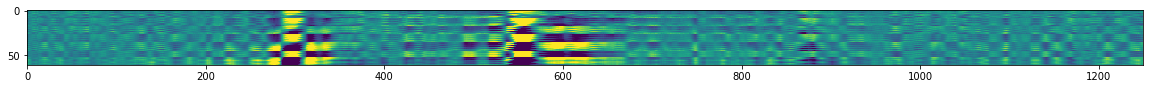

In [170]:
plt.figure(figsize=(20,20))
plt.imshow(means, vmin=plt_vmin, vmax=plt_vmax)

In [171]:
stds = np.std(pp_and_pnp_stacked, axis=0)

In [172]:
plt_vmin = np.percentile(stds, 5)
plt_vmax = np.percentile(stds, 95)

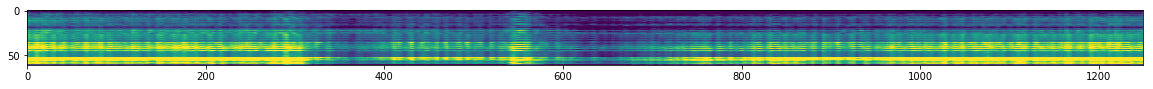

In [173]:
plt.figure(figsize=(20,20))
plt.imshow(stds,vmin=plt_vmin, vmax=plt_vmax)

In [25]:
labels = [1] * pp_train_len + [0] * pnp_train_len
test_labels = [test_label] * len(test)

It's time to learn

In [26]:
from sklearn import neighbors, svm
from sklearn.model_selection import train_test_split

In [27]:
knn = neighbors.KNeighborsClassifier(n_neighbors=130)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.05)

In [29]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=130, p=2,
                     weights='uniform')

In [30]:
knn.score(x_train, y_train)

0.5

In [31]:
knn.score(x_test, y_test)

0.4583333333333333

In [32]:
knn.predict(test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [33]:
np.count_nonzero(knn.predict(test) == test_labels)/len(test)

0.0

### Cross validation

In [34]:
def classify_knn_with_xvalid(data_pp_bp, data_pnp_bp, n_neighbours, selected_channels, test_index, mul, verbose=True):
    
    data_bp = np.concatenate((data_pp_bp, data_pnp_bp))
    
    test_is_pp, test_label = test_setup(test_index, len(data_pp_bp))
    test_p, train_p = get_train_test(data_bp, test_index)
    train_p_separated = np.vstack(train_p)
    pp_train_len, pnp_train_len = get_pp_pnp_length(pp_count, pnp_count, len(test_p), test_is_pp)
    
    train = ravel_all_trials(train_p_separated, selected_channels) * mul
    test = ravel_all_trials(test_p, selected_channels) * mul
    
    labels = [1] * pp_train_len + [0] * pnp_train_len
    test_labels = [test_label] * len(test)
    
    if verbose:
        print('Test index', test_index, 'Preparing to classify set of', pp_train_len, 'PP and', pnp_train_len, 'PNP.')
    
    clas = neighbors.KNeighborsClassifier(n_neighbors=n_neighbours)
    clas.fit(train, labels)
    train_acc = clas.score(train, labels)
    test_acc = clas.score(test, test_labels)
    
    if verbose:
        print('Train score:', train_acc, '  Test score:', test_acc)
    
    return test_acc
    
    

In [35]:
classify_knn_with_xvalid(pp_rh, pnp_rh, 23, [0, 3, 10, 36], 2, 10000000000000)

Test index 2 Preparing to classify set of 471 PP and 473 PNP.
Train score: 0.5010593220338984   Test score: 0.01694915254237288


0.01694915254237288

#### Cross validate over the whole dataset

In [31]:
total_score = 0
patients_correct = 0
for i in range(len(pp_and_pnp_bp)):
    score = classify_knn_with_xvalid(pp_rh, pnp_rh, 11, [36], i, mul)
    total_score += score
    if score > 0.5:
        patients_correct += 1
    
# TODO log acc for each patient
    
print(total_score/len(pp_and_pnp_bp))
print('Correctly labeled', patients_correct, 'out of', len(pp_and_pnp_bp))

Test index 0 Preparing to classify set of 473 PP and 473 PNP.
Train score: 0.5243128964059197   Test score: 0.0
Test index 1 Preparing to classify set of 473 PP and 473 PNP.
Train score: 0.5264270613107822   Test score: 0.0
Test index 2 Preparing to classify set of 471 PP and 473 PNP.
Train score: 0.5010593220338984   Test score: 0.3898305084745763
Test index 3 Preparing to classify set of 476 PP and 473 PNP.
Train score: 0.5258166491043204   Test score: 0.0
Test index 4 Preparing to classify set of 479 PP and 473 PNP.
Train score: 0.5283613445378151   Test score: 0.0
Test index 5 Preparing to classify set of 472 PP and 473 PNP.
Train score: 0.5333333333333333   Test score: 0.0
Test index 6 Preparing to classify set of 474 PP and 473 PNP.
Train score: 0.529039070749736   Test score: 0.0
Test index 7 Preparing to classify set of 498 PP and 473 PNP.
Train score: 0.5149330587023687   Test score: 0.0
Test index 8 Preparing to classify set of 478 PP and 473 PNP.
Train score: 0.5299684542586

#### Cross validate over multiple channels

In [33]:
file = open('all_results/eeg_knn_results.csv', 'a', newline='')
name = 'Raw EEG + KNN'
notes = 'k='

previous_channels = [32]
k = 3

max_acc = {'index': 0, 'value': 0}
for channel in range(61):    
    total_score = 0
    correct_patients = 0
    for i in range(len(pp_and_pnp_bp)):
        score = classify_knn_with_xvalid(pp_rh, pnp_rh, k, [channel], i, mul, verbose=False)
        total_score += score
        if score > 0.5:
            correct_patients += 1
        
    avg_score = total_score/len(pp_and_pnp_bp)
    print(channel, avg_score, correct_patients)
    
    log_result(file, name, avg_score, correct_patients, len(pp_and_pnp_bp), 'RH', str(previous_channels + [channel]), notes + str(k))
    
    if avg_score > max_acc['value']:
        max_acc['index'] = channel
        max_acc['value'] = avg_score
        
print('Max accuracy:', max_acc['index'], max_acc['value'])

0 0.46991582106736157 8
1 0.47381277029424523 7
2 0.41997674516306605 8
3 0.45931555237285077 9
4 0.47612377857744725 9
5 0.5050709897544378 9
6 0.4638077181738826 8
7 0.46599164265320026 9
8 0.517520556213784 10
9 0.45289412995389 10
10 0.4331109517482022 8
11 0.439536656836515 8
12 0.4626291481134858 9
13 0.4890337024310835 9
14 0.5054253069404429 10
15 0.4713034560728073 8
16 0.5014555763396941 9
17 0.49844385932092716 12
18 0.4382522563833893 8
19 0.444242910285917 8
20 0.4503299423013964 8
21 0.47930209018523023 9
22 0.49201050983585704 9
23 0.5047951437335915 9
24 0.45463910048540335 8
25 0.514513129241401 10
26 0.4663409102372305 10
27 0.5191882061221635 10
28 0.48453181616557156 9
29 0.5232063646789687 10
30 0.4744390332479901 9
31 0.5198294446666052 10
32 0.5255708013283434 10
33 0.5020383256335248 10
34 0.5135487499978658 10
35 0.4879443911502734 8
36 0.5032048105197079 10
37 0.5068556513694783 10
38 0.4992282023325734 10
39 0.5046078407916669 9
40 0.5132854097208583 10
41 0.

### Cross validate over multiple n_neighbours

In [34]:
file = open('all_results/eeg_knn_results.csv', 'a', newline='')
name = 'Raw EEG + KNN'
notes = 'k='

channels = [0, 2, 11, 19, 33, 36, 37, 39, 43, 49, 50]

max_acc = {'index': 0, 'value': 0}
for n_neighbours in range(1, 200, 10):    
    total_score = 0
    correct_patients = 0
    for i in range(len(pp_and_pnp_bp)):
        score = classify_knn_with_xvalid(pp_rh, pnp_rh, n_neighbours, channels, i, mul, verbose=False)
        total_score += score
        if score > 0.5:
            correct_patients += 1
        
    avg_score = total_score/len(pp_and_pnp_bp)
    print(n_neighbours, avg_score, correct_patients)

    log_result(file, name, avg_score, correct_patients, len(pp_and_pnp_bp), 'RH', str(channels), notes + str(n_neighbours))

    if avg_score > max_acc['value']:
        max_acc['index'] = n_neighbours
        max_acc['value'] = avg_score
        
print('Max accuracy:', max_acc['index'], max_acc['value'])

1 0.5103561076237874 9
11 0.48268741533683557 9
21 0.47546833184656556 9
31 0.47368421052631576 9


KeyboardInterrupt: 

In [35]:
file.close()

### SVM

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
def classify_svm_with_xvalid(data_pp_bp, data_pnp_bp, nu, selected_channels, test_index, mul, verbose=True):
    
    data_bp = np.concatenate((data_pp_bp, data_pnp_bp))
    
    test_is_pp, test_label = test_setup(test_index, len(data_pp_bp))
    test_p, train_p = get_train_test(data_bp, test_index)
    train_p_separated = np.vstack(train_p)
    pp_train_len, pnp_train_len = get_pp_pnp_length(pp_count, pnp_count, len(test_p), test_is_pp)
    
    train = ravel_all_trials(train_p_separated, selected_channels) * mul
    test = ravel_all_trials(test_p, selected_channels) * mul
    
    labels = [1] * pp_train_len + [0] * pnp_train_len
    test_labels = [test_label] * len(test)
    
    if verbose:
        print('Test index', test_index, 'Preparing to classify set of', pp_train_len, 'PP and', pnp_train_len, 'PNP.')
    
    clas = svm.NuSVC(nu=nu, kernel='linear')
    clas.fit(train, labels)
    train_acc = clas.score(train, labels)
    test_acc = clas.score(test, test_labels)
    
    if verbose:
        print('Train score:', train_acc, '  Test score:', test_acc)
    
    return test_acc
    

In [38]:
total_score = 0
patients_correct = 0
for i in range(len(pp_and_pnp_bp)):
    score = classify_svm_with_xvalid(pp_rh, pnp_rh, 0.7, [2, 26], i, mul)
    total_score += score
    if score > 0.5:
        patients_correct += 1
    

print(total_score/len(pp_and_pnp_bp))
print('Correctly labeled', patients_correct, 'out of', len(pp_and_pnp_bp))

Test index 0 Preparing to classify set of 473 PP and 473 PNP.
Train score: 0.7325581395348837   Test score: 0.8070175438596491
Test index 1 Preparing to classify set of 473 PP and 473 PNP.
Train score: 0.7399577167019028   Test score: 0.7543859649122807
Test index 2 Preparing to classify set of 471 PP and 473 PNP.
Train score: 0.7341101694915254   Test score: 0.6949152542372882
Test index 3 Preparing to classify set of 476 PP and 473 PNP.
Train score: 0.7376185458377239   Test score: 0.5740740740740741
Test index 4 Preparing to classify set of 479 PP and 473 PNP.
Train score: 0.6785714285714286   Test score: 0.9607843137254902
Test index 5 Preparing to classify set of 472 PP and 473 PNP.
Train score: 0.7216931216931217   Test score: 0.9482758620689655
Test index 6 Preparing to classify set of 474 PP and 473 PNP.
Train score: 0.6832101372756072   Test score: 0.05357142857142857
Test index 7 Preparing to classify set of 498 PP and 473 PNP.
Train score: 0.631307929969104   Test score: 1.0

In [40]:
file = open('all_results/eeg_svm_results.csv', 'a', newline='')
name = 'Raw EEG + SVM'
notes = 'nu='

previous_channels = [26]
nu = 0.7

max_acc = {'index': 0, 'value': 0}
for channel in range(61):    
    total_score = 0
    correct_patients = 0
    for i in range(len(pp_and_pnp_bp)):
        score = classify_svm_with_xvalid(pp_rh, pnp_rh, nu, previous_channels + [channel], i, mul, verbose=False)
        total_score += score
        if score > 0.5:
            correct_patients += 1
        
    avg_score = total_score/len(pp_and_pnp_bp)
    print(channel, avg_score, correct_patients)

    log_result(file, name, avg_score, correct_patients, len(pp_and_pnp_bp), 'RH', str(previous_channels + [channel]), notes + str(nu))    
    
    if avg_score > max_acc['value']:
        max_acc['index'] = channel
        max_acc['value'] = avg_score
        
print('Max accuracy:', max_acc['index'], max_acc['value'])

0 0.7721107963541906 16
1 0.77160832768446 16
2 0.7808894782249854 16
3 0.7600495165514746 16
4 0.7013209026114935 14
5 0.7376768109052331 14
6 0.7353254252359522 16
7 0.7601542419662268 15
8 0.7479025177243257 17
9 0.7132250585798863 14
10 0.7611195197062589 16
11 0.7238497445514023 15
12 0.7248362449805397 14
13 0.7151321467454593 14
14 0.759650695053489 15
15 0.7474803080541874 16
16 0.7427330115728866 16
17 0.7445129965658547 16
18 0.6881622776734142 14
19 0.7753255436731367 17
20 0.7214909446474597 16
21 0.7582488738560801 17
22 0.6763552707870506 15
23 0.7267534617043708 14
24 0.7381053026454681 16
25 0.7360251674919812 14
26 0.7760611549428368 16
27 0.7510437264060854 16
28 0.7559441935181379 15
29 0.7514190872065999 16
30 0.7574207619583825 15
31 0.7390348491184718 16
32 0.7408315226265498 15
33 0.7303746151220615 16
34 0.7467505663574542 17
35 0.7059855684246608 15
36 0.6037884952889517 13
37 0.6617028525429925 14
38 0.6780191792157598 14
39 0.7026917540099411 14
40 0.69386191

In [58]:
file = open('all_results/eeg_svm_results.csv', 'a', newline='')
name = 'Raw EEG + SVM'
notes = 'nu='

channels = [4]

max_acc = {'index': 0, 'value': 0}
for nu in np.arange(0.1, 0.8, 0.1):    
    total_score = 0
    correct_patients = 0
    for i in range(len(pp_and_pnp_bp)):
        score = classify_svm_with_xvalid(pp_rh, pnp_rh, nu, channels, i, mul, verbose=False)
        total_score += score
        if score > 0.5:
            correct_patients += 1
        
    avg_score = total_score/len(pp_and_pnp_bp)
    print(nu, avg_score, correct_patients)
    
    log_result(file, name, avg_score, correct_patients, len(pp_and_pnp_bp), 'RH', str(channels), notes + str(nu))    
    
    if avg_score > max_acc['value']:
        max_acc['index'] = nu
        max_acc['value'] = avg_score
        
print('Max accuracy:', max_acc['index'], max_acc['value'])

0.1 0.46270517349983775 9
0.2 0.43512826068102156 8
0.30000000000000004 0.5148066385595179 10
0.4 0.4867335673892686 9
0.5 0.5234396765127315 11
0.6 0.5713423058445385 11
0.7000000000000001 0.612085582398378 12
Max accuracy: 0.7000000000000001 0.612085582398378
